# Sparse Autoencoder for image 

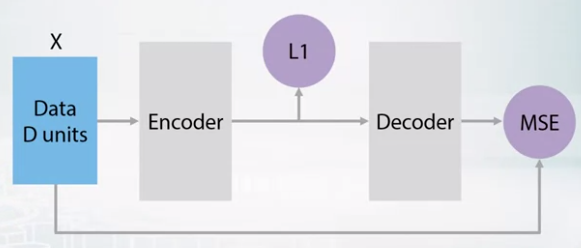

Sparse autoencoders have hidden nodes greater than input nodes. They can still discover important features from the data. A generic sparse autoencoder is visualized where the obscurity of a node corresponds with the level of activation. Sparsity constraint is introduced on the hidden layer. This is to prevent output layer copy input data. Sparsity may be obtained by additional terms in the loss function during the training process, either by comparing the probability distribution of the hidden unit activations with some low desired value,or by manually zeroing all but the strongest hidden unit activations.

__Advantages__-

- Sparse autoencoders have a sparsity penalty, a value close to zero but not exactly zero. Sparsity penalty is applied on the hidden layer in addition to the reconstruction error. This prevents overfitting.
- They take the highest activation values in the hidden layer and zero out the rest of the hidden nodes. This prevents autoencoders to use all of the hidden nodes at a time and forcing only a reduced number of hidden nodes to be used.

__Drawbacks__-

For it to be working, it's essential that the individual nodes of a trained model which activate are data dependent, and that different inputs will result in activations of different nodes through the network

## 2. Data Preparation

To train a denoising autoencoder on MNIST handwritten digits dataset available through Keras. 

### IMPORT LIBRARIES

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow.keras import regularizers
regularizers
warnings.filterwarnings('ignore')
%matplotlib inline

from tensorflow.keras.datasets import mnist

### IMPORT DATASET

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()
 
print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testy.shape))

11493376/11490434 [==============================] - 0s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


MNIST handwritten digits dataset comes with 60K labeled handwritten digit images in the training partition and 10K images in the test partition. Here is a glimpse of 5 images from the dataset. Each image is of 28 * 28 dimensions.

### PERFORM DATA VISUALIZATION

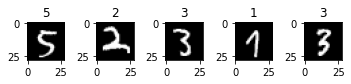

In [3]:
for j in range(5):
    i = np.random.randint(0, 10000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

 ### PERFORM DATA PREPROCESSING

- Prepare training and test datasets separately for clean and noisy versions of images.
- Noisy images will be fed as input and the reconstructed images would be compared with the cleaner versions of the corresponding images. 
- Images are reshaped to add an extra dimension for channels

In [5]:
train_clean = [image/255 for image in trainX]
test_clean = [image/255 for image in testX]
 
 
train_clean = np.reshape(train_clean, (60000, 28, 28, 1))
test_clean = np.reshape(test_clean, (10000, 28, 28, 1))
 
print (train_clean.shape, test_clean.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


## 3. Training Convolutional Denoising Autoencoder

In this  architecture and train it on the prepared dataset.

### Architecture

The model starts with an input layer that takes a batch of images as input with each image having dimensions=(28 * 28 * 1). 

In [6]:
inputshape=(28, 28, 1)


#### Encoder part

- The first few layers(encoder part) are composed of Convolutional layers followed by MaxPooling layers. 
- The encoder part of the model downsamples the image across width and height and extracts features.

In [89]:
encoder = tf.keras.models.Sequential()
encoder.add(tf.keras.layers.InputLayer((28, 28, 1)))
encoder.add(tf.keras.layers.Flatten())                 
encoder.add(tf.keras.layers.Dense(784,activity_regularizer=regularizers.l1(10e-5),))

In [90]:
decoder = tf.keras.models.Sequential()
decoder.add(tf.keras.layers.InputLayer((784,)))
decoder.add(tf.keras.layers.Dense(np.prod((28, 28, 1))))  
decoder.add(tf.keras.layers.Reshape((28, 28, 1)))         

In [91]:
input_data = tf.keras.layers.Input((28, 28, 1))
code = encoder(input_data)
reconstruction = decoder(code)

#### Loss

The final task is to compare the reconstructed image with the cleaner version of the input image. As these images are represented with pixel values, we can use mean squared error(MSE) to quantify the goodness of the autoencoder. We will use the Adam optimizer that will tune the model weights such that MSE is reduced.

In [92]:
autoencoder = tf.keras.models.Model(inputs=input_data, outputs=reconstruction)
# Compile model
autoencoder.compile(loss='mse', optimizer='adam',metrics=['mse', 'accuracy'])
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_23 (Sequential)   (None, 784)               615440    
_________________________________________________________________
sequential_24 (Sequential)   (None, 28, 28, 1)         615440    
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________


#### Training

train the model on training data where noisy images are passed as input and clean images are passed as the output of the model. The test dataset is kept as validation data in order to check the MSE on test batches. 

In [93]:
# Fit the model
history =autoencoder.fit(train_clean, train_clean, epochs=10, verbose=1,validation_data=(test_clean, test_clean))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0121 - mse: 0.0044 - accuracy: 0.8151 - val_loss: 0.0064 - val_mse: 0.0012 - val_accuracy: 0.8145
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - mse: 0.0013 - accuracy: 0.8155 - val_loss: 0.0049 - val_mse: 0.0011 - val_accuracy: 0.8145
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0046 - mse: 0.0012 - accuracy: 0.8155 - val_loss: 0.0046 - val_mse: 0.0015 - val_accuracy: 0.8145
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - mse: 0.0012 - accuracy: 0.8155 - val_loss: 0.0040 - val_mse: 0.0013 - val_accuracy: 0.8145
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0038 - mse: 0.0012 - accuracy: 0.8155 - val_loss: 0.0039 - val_mse: 0.0013 - val_accuracy: 0.8145
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0036 - mse: 0.0012 - accuracy: 0.8155 - va

#4. EVALUATE TRAINED MODEL PERFORMANCE

In [94]:
autoencoder.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [95]:
evaluation = autoencoder.evaluate(np.array(test_clean.reshape(-1, 28, 28, 1)), test_clean.reshape(-1, 28, 28, 1))
print("%s: %.2f%%" % (autoencoder.metrics_names[2], evaluation[2]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0032 - mse: 0.0011 - accuracy: 0.8145
accuracy: 81.45%


In [96]:
predicted=autoencoder.predict(np.array(test_clean[10:20].reshape(-1, 28, 28, 1)))

In [97]:
predicted.shape

(10, 28, 28, 1)

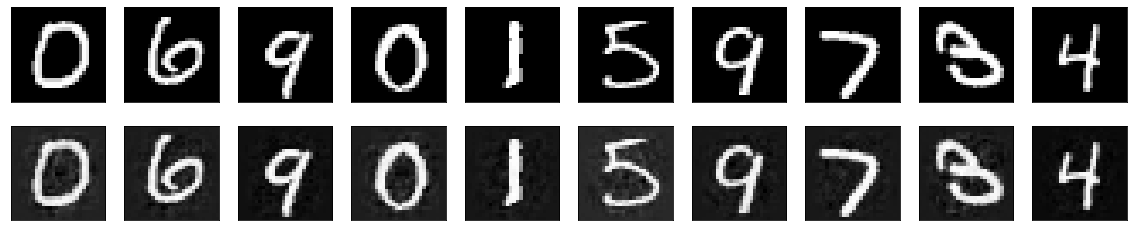

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([np.array(test_clean[10:20]), predicted], axes):
      for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)